In [2]:
import torch
import os

torch.cuda.get_device_name(0)
cwd = os.getcwd()
print(cwd)

/home/ubuntu


Test download image from Gan Loaded model!

In [5]:
import pandas as pd
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -o bank-additional.zip
data = pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', 500)     # Make sure we can see all of the columns
pd.set_option('display.max_rows', 5)         # Keep the output on one page
data

--2019-05-23 00:14:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘bank-additional.zip’ not modified on server. Omitting download.

Archive:  bank-additional.zip
  inflating: bank-additional/.DS_Store  
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/home/ubuntu/GanZoo/pro_gan_pytorch.zip', 'r')
zip_ref.extractall('/home/ubuntu/GanZoo/pro_gan_pytorch')
zip_ref.close()

<class 'torch.utils.data.dataloader._DataLoaderIter'>
images shape on batch size = torch.Size([8, 3, 256, 256])
labels shape on batch size = torch.Size([8])


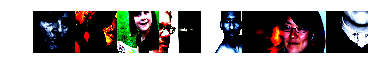

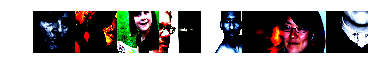

In [9]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, utils
%matplotlib inline
#Torchvision to load dataset, and transform the dataset according to your requirement.
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

def load_dataset():
    data_path = 'data/celeba/data/'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=data_transform
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=8,
        num_workers=0,
        shuffle=True
    )
    return train_loader


#Use iterator to iterate over the datasets
train_iter = iter(load_dataset())

#Once you have your data in form of tensors, train your network or do your desired goal.

print(type(train_iter))

images, labels = train_iter.next()
print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))


# The generated images from GANs will be in tensors, transpose them to plot it on graph
grid = torchvision.utils.make_grid(images)
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.show()

grid = torchvision.utils.make_grid(images)
# plt.imshow((grid * 255).astype(np.uint8))
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.show()
